In [25]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Exportamos el dataset
data = pd.read_csv('distribucion_renta_cdmx_clean.csv')
df = pd.DataFrame(data)
df

,Unnamed: 0,Direccion,Costo,Baños,Recamaras,Area,Estacionamientos,Seguridad,Balcon,Terraza,Jardines,Alberca,Gimnasio
0,0,"Juárez, Cuauhtémoc, Ciudad de México",17500.0,2.0,2.0,70.0,0,0,0,0,0,0,0
1,1,"Lomas de Sotelo, Naucalpan de Juárez, Estado d...",14900.0,2.0,2.0,68.0,0,0,0,0,0,0,0
2,2,"Tabacalera, Cuauhtémoc, Ciudad de México",33000.0,2.0,2.0,90.0,0,0,0,0,0,0,0
3,3,"Ampliación Granada, Miguel Hidalgo, Ciudad de ...",40200.0,1.0,1.0,68.0,0,1,0,0,0,0,0
4,4,"Ampliación Granada, Miguel Hidalgo, Ciudad de ...",24600.0,1.0,1.0,42.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,4438,"Narvarte, Benito Juárez, Ciudad de México",22000.0,2.0,2.0,95.0,0,0,0,1,0,0,0
4439,4439,"Polanco, Miguel Hidalgo, Ciudad de México",27000.0,1.0,2.0,85.0,0,0,0,0,0,0,0
4440,4440,"Nueva Vallejo, Gustavo A. Madero, Ciudad de Mé...",23000.0,2.0,2.0,52.0,0,0,0,1,0,0,0
4441,4441,"Área 1, Cuauhtémoc, Ciudad de México",9000.0,1.0,2.0,63.0,0,0,0,0,0,0,0


In [21]:
df = df.drop(['Unnamed: 0'],axis=1)

In [ ]:
#extraemos lista de alcaldias y localidades
colonias=[]
alcaldias = []
for i in range(len(df['Direccion'])):
  colonias.append(df['Direccion'][i].split(',')[0])
  alcaldias.append(df['Direccion'][i].split(',')[1])



for alcaldia in set(alcaldias):
  print(alcaldia)
 


 Tláhuac
 Álvaro Obregón
 La Magdalena Contreras
 Coyoacán
 Gustavo A. Madero
 Iztacalco
 Iztapalapa
 Ciudad de México
 Huixquilucan
 Milpa Alta
 Azcapotzalco
 Tlalpan
 Cuajimalpa de Morelos
 Naucalpan de Juárez
 Benito Juárez
 Cuauhtémoc
 Venustiano Carranza
 Xochimilco
 Miguel Hidalgo


In [ ]:
#Incorporamos la lista de alcaldías en una columna independiente
df['Alcaldia']=alcaldias
df

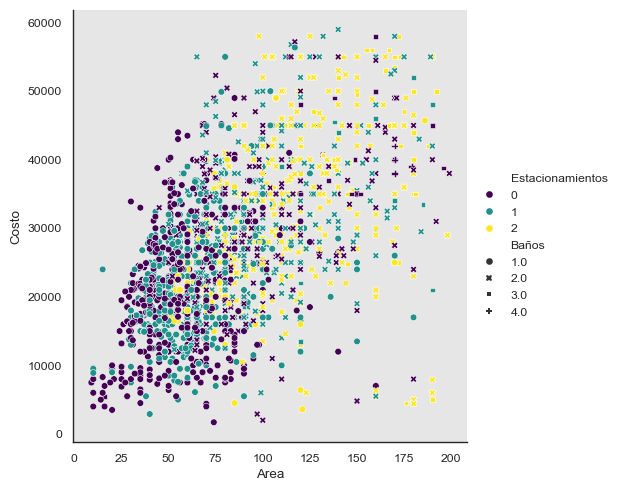

In [ ]:
#Scatterplot Costos contra área
df_filt = df.loc[(df['Costo']<60000 )  & (df['Area']<200) & (df['Estacionamientos']<3)& (df['Baños']<5)]
sns.set_style("white", {"axes.facecolor": ".9"})
sns.set_context("paper")
sns.relplot(data=df_filt,x=df_filt['Area'],y=df_filt['Costo'],hue=df_filt['Estacionamientos'],style='Baños',palette='viridis')

<Axes: xlabel='Area', ylabel='Costo'>

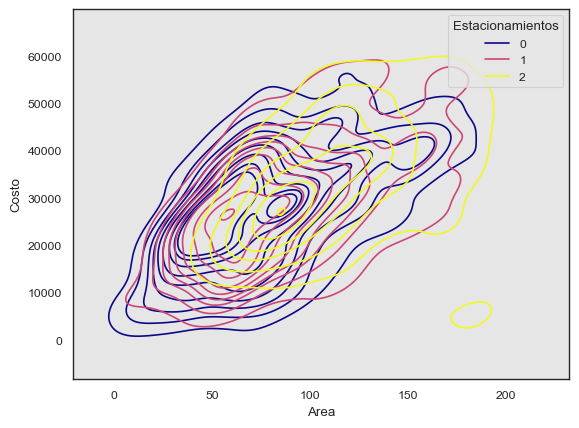

In [ ]:
#Kernel dendisty plot Costos contra área

df_filt = df.loc[(df['Costo']<60000 )  & (df['Area']<200) & (df['Estacionamientos']<3)& (df['Baños']<5)]
sns.set_style("white", {"axes.facecolor": ".9"})
sns.set_context("paper")
sns.kdeplot(data=df_filt,x=df_filt['Area'],y=df_filt['Costo'],hue=df_filt['Estacionamientos'],palette='plasma')

In [162]:
df_filt.iloc[:,[1,3,4]]

,Costo,Recamaras,Area
0,17500.0,2.0,70.0
1,14900.0,2.0,68.0
2,33000.0,2.0,90.0
3,40200.0,1.0,68.0
4,24600.0,1.0,42.0
...,...,...,...
4438,22000.0,2.0,95.0
4439,27000.0,2.0,85.0
4440,23000.0,2.0,52.0
4441,9000.0,2.0,63.0


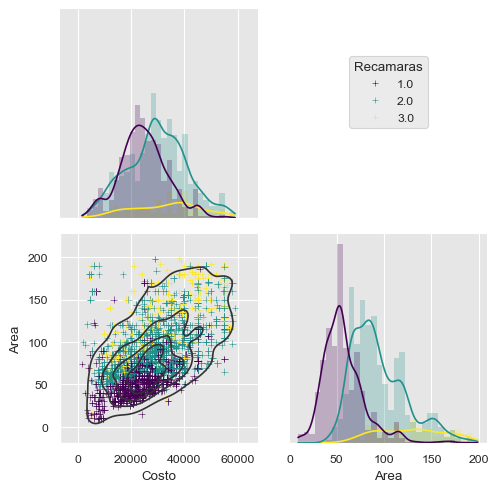

In [ ]:
#Pairplots areas y costos
data = df_filt.iloc[:,[1,3,4]]
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

g = sns.PairGrid(data.loc[data['Recamaras']<4], hue="Recamaras", corner=True,palette='viridis')
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.75, .8))

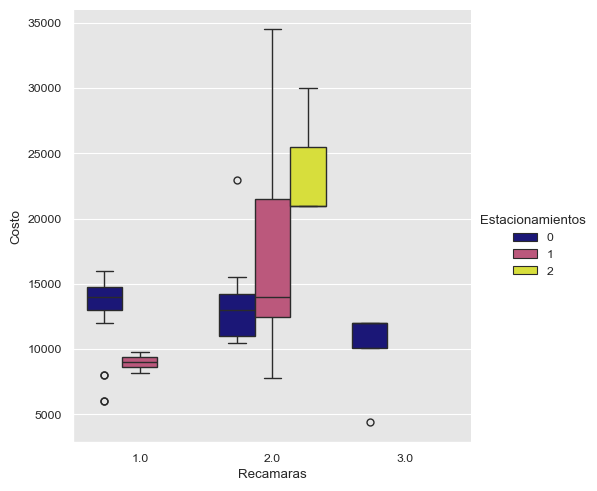

In [ ]:
#Box plots (alcaldia gustavo)
df_filt_alc = df_filt.loc[df_filt['Direccion'].str.contains('Gustavo')]
sns.catplot(data=df_filt_alc[df_filt_alc['Recamaras']<4],x='Recamaras',y='Costo',kind='box',hue='Estacionamientos',palette='plasma')

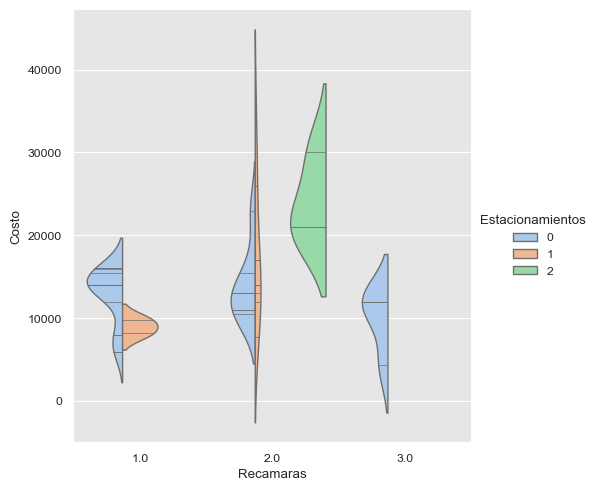

In [ ]:
#Boxplots estilo violín
df_filt_alc = df_filt.loc[df_filt['Direccion'].str.contains('Gustavo')]
sns.catplot(data=df_filt_alc[df_filt_alc['Recamaras']<4],x='Recamaras',y='Costo',kind='violin',hue='Estacionamientos',palette='pastel',inner='sticker',split=True)

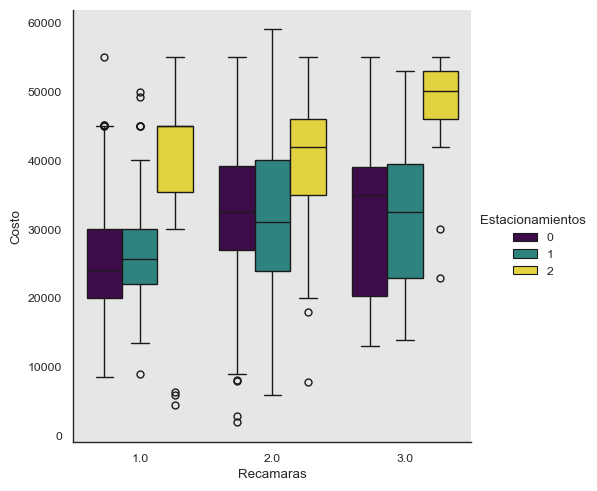

In [ ]:
#Más boxplots (alcaldía cuauhtemoc)
delegacion = 'Cuauhtémoc'
df_filt_alc = df_filt.loc[df_filt['Direccion'].str.contains(delegacion)]
sns.catplot(data=df_filt_alc[df_filt_alc['Recamaras']<4],x='Recamaras',y='Costo',kind='box',hue='Estacionamientos',palette='viridis')

In [ ]:
#Filtramos algunas alcaldías
alc =[list(set(alcaldias))[4],list(set(alcaldias))[12],list(set(alcaldias))[-1],list(set(alcaldias))[1],list(set(alcaldias))[6]]
alc
df_filt_alc = df_filt.loc[df_filt['Alcaldia'].isin(alc)]



array([' Miguel Hidalgo', ' Cuajimalpa de Morelos', ' Álvaro Obregón',
       ' Iztapalapa', ' Gustavo A. Madero'], dtype=object)

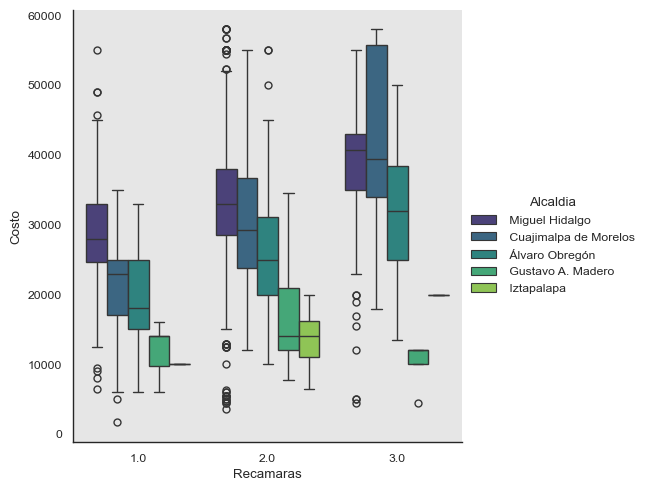

In [ ]:
#Boxplots con diferentes alcaldías
sns.catplot(data=df_filt_alc[df_filt_alc['Recamaras']<4],x='Recamaras',y='Costo',kind='box',hue='Alcaldia',palette='viridis')

[' Gustavo A. Madero',
 ' Cuajimalpa de Morelos',
 ' Miguel Hidalgo',
 ' Álvaro Obregón',
 'Coyoacán']